# FIT5196 Assessment 1: Text Processing
#### Student Name:  Shih Ting Chu
#### Student ID:  29286875

Date: Aug 15

Environment: Python 3.6.3 and Jupyter notebook
Libraries used: 
* BeautifulSoup (for XML parsing)
* nltk - natural language toolkit (tokenizer, lemmatizer, stopwords, collocations and probabilities)
* re (for regular expression, included in Anaconda Python 2.7) 
* matplotlib (for plotting)


## 1. Introduction
This analysis extracts data from an XML-based corpus containing 2500 patent documents. Data was extracted by reading the input file 'patents/patents.xml', splitting at the document boundaries (i.e. XML headers) and then creating a list where each item in the list holds the full XML for each individual patent.

Data relating to patent classifications and citations was extracted using the package `BeautfulSoup` to extract values from specific XML tags. Similarly, the text associated with abstracts was extracted for further pre-processing.

Text pre-processing was performed with the objective of producing a lexical vocabulary for the patents and the associated sparse count vector for each abstract. The pre-processing included tokenisation, lemmatisation and removal of stopwords. Additionally, the most frequent and least frequent words were removed, and meaningful bigrams were identified.  The initial tokenised vocabulary of the corpus was 9690 words, which was reduced to 4906 words following pre-processing.



## 2.  Import libraries 

In [1]:
import re # library for regular expression
import pandas as pd

## 3. Examining and loading data

The file "patents.xml" contains 2500 patents. Each patent is structured in an XML file. In order to process the data, the xml associated with each patent is identified using a regular expression.

The initial processing is memory efficient and fast, and creates a list of length 2500, with each item in the list containing the full xml for each patent.
  

### 3.1 Inital loading patent.xml file

Total Lines read:  1791369
Number of XML headers:  2500


### 3.2 Identifying the XML structure
The package 'BeautifulSoup' is used to explore the xml structure, and to extract the required information.
The full xml tree for the first patent is shown below.

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE us-patent-grant SYSTEM "us-patent-grant-v42-2006-08-23.dtd">
<us-patent-grant country="US" date-produced="20110208" date-publ="20110222" dtd-version="v4.2 2006-08-23" file="USPP021722-20110222.XML" id="us-patent-grant" lang="EN" status="PRODUCTION">
 <us-bibliographic-data-grant>
  <publication-reference>
   <document-id>
    <country>
     US
    </country>
    <doc-number>
     PP021722
    </doc-number>
    <kind>
     P3
    </kind>
    <date>
     20110222
    </date>
   </document-id>
  </publication-reference>
  <application-reference appl-type="plant">
   <document-id>
    <country>
     US
    </country>
    <doc-number>
     12316880
    </doc-number>
    <date>
     20081216
    </date>
   </document-id>
  </application-reference>
  <us-application-series-code>
   12
  </us-application-series-code>
  <us-term-of-grant>
   <us-term-extension>
    108
   </us-term-extension>
  </us-term-of-grant>
  <classifications-ipcr>
   <cla

The XML structure within specific tags is used to extract the required information for this analysis. The function `show_tree` is used to examine the specific structure of the XML of interest.

#### XML Structure - Citations
The structure of the xml tree within the 'citation' tag is used to identify cited patents. A patent may cite more than one other patent. 

Creation of the citation network uses the `<doc-number>` tag nested under the `<citation>` tag.

<citation>
<patcit num="00001">
<document-id>
<country>US</country>
<doc-number>PP17672</doc-number>
<kind>P3</kind>
<name>Hofmann</name>
<date>20070500</date>
</document-id>
</patcit>
<category>cited by examiner</category>
<classification-national><country>US</country><main-classification>PLT161</main-classification></classification-national>
</citation>


#### XML Structure - Publication Reference
The publication reference contains the document number for the patent. 

The tag of interest is the `<doc-number>` tag nested within the `<publication-reference>` tag.

<publication-reference>
<document-id>
<country>US</country>
<doc-number>PP021722</doc-number>
<kind>P3</kind>
<date>20110222</date>
</document-id>
</publication-reference>


#### XML Structure - Classifications
There are multple parts to the classification: `<classification-level>`, `<section>`, `<class>`, `<subclass>`, `<main-group>` and `<subgroup>`.  These tags are all nested under the `<classifications-ipcr>` tag.

<classifications-ipcr>
<classification-ipcr>
<ipc-version-indicator><date>20060101</date></ipc-version-indicator>
<classification-level>A</classification-level>
<section>A</section>
<class>01</class>
<subclass>H</subclass>
<main-group>5</main-group>
<subgroup>00</subgroup>
<symbol-position>F</symbol-position>
<classification-value>I</classification-value>
<action-date><date>20110222</date></action-date>
<generating-office><country>US</country></generating-office>
<classification-status>B</classification-status>
<classification-data-source>H</classification-data-source>
</classification-ipcr>
</classifications-ipcr>


## 4. Parsing XML and Extracting all the required information 

The `Patent` class is used to extract the required information for citations, ipc_code and abstracts. The class is instantiated with the xml text associated with a patent, converted to a `BeautifulSoup` object, and then uses the BeautifulSoup methods `find` and `find_all` to extract the required information.


### 4.1 Extracting the Citation Network, Hierarchical IPC Code, and Creation of  a List of Abstracts 
For each patent in the document list (`doc_list`), the xml text is passed to the class object, and the required information retrieved. In the case of citations and classifications, this information is passed straight to a file. For abstracts, a list containing all paragraphs associated with each abstract is created. Additionally, a list of patent IDs is also created.

2500


### 4.2 Identify number of patent citations: 
The citation network can be described by counting the number of times a patent is cited. The file `cited.txt` contains a list of all patents cited, and the number of times they have been cited, in the format `patentID: # of times cited`

Total Citations:  47041
Unique Patents cited:  40728
47041


An alternate way of exploring the citation network is to count how many other patents are cited by each of the 2500 patents.
The number of patent citations cited by each of the 2500 patents is calculated from the previously created `citations.txt` file.
`Cited_alt.txt` contains the total count of patents cited by each of the 2500 patents in the patent list, in the format `PatentID: # of patents cited`.

2500


['PP021722:3',
 'RE042159:11',
 'RE042170:21',
 '07891018:13',
 '07891019:8',
 '07891020:20',
 '07891021:7',
 '07891023:34',
 '07891025:10',
 '07891026:26',
 '07891027:8',
 '07891029:22',
 '07891030:6',
 '07891032:1',
 '07891033:5',
 '07891034:18',
 '07891036:37',
 '07891037:4',
 '07891038:20',
 '07891039:12',
 '07891041:9',
 '07891044:40',
 '07891053:20',
 '07891055:16',
 '07891056:18',
 '07891057:17',
 '07891058:31',
 '07891059:21',
 '07891060:8',
 '07891063:18',
 '07891067:13',
 '07891070:13',
 '07891071:28',
 '07891076:49',
 '07891078:8',
 '07891082:13',
 '07891083:2',
 '07891084:4',
 '07891086:8',
 '07891087:8',
 '07891097:20',
 '07891098:9',
 '07891104:3',
 '07891107:10',
 '07891111:10',
 '07891114:108',
 '07891115:13',
 '07891116:11',
 '07891117:15',
 '07891118:11',
 '07891121:23',
 '07891123:9',
 '07891129:16',
 '07891133:24',
 '07891136:27',
 '07891139:15',
 '07891140:13',
 '07891141:17',
 '07891146:33',
 '07891148:89',
 '07891152:23',
 '07891158:40',
 '07891159:31',
 '0789116

## 5. Preprocessing the abstracts 

The goal of text pre-processing is to convert unstructure text into structured data. For this analysis, a sparse count vector is produced.

Pre-processing of the abstract text is achieved using the following steps:
  -   initial tokenisation, conversion to lower case, and removal of non-alpha tokens.
  -   lemmatisation for nouns, e.g. surfaces -> surface
  -   removal of stopwords
  -   identification and removal of the 20 most frequent words according to document frequency
  -   identification and removal of the those words that appear in only one document
  -   identification of meaningful bigrams, and replacement of unigram tokens with bigrams for 100 of the most meaningful.
  -   creation of a vocabulary for the patent abstracts, containing words (tokens) with lexical significance.
  -   reduction of final tokenised abstracts to a sparse count vector


### 5.1 Pre-processing Functions
The functions used to tokenise, remove tokens (stopwords and most and least used words) and create the document statistics are shown below.


In [12]:
# Code to tokenize the abstract



### 5.2  Tokenise Abstracts
The abstracts are tokenized to return only those tokens that are alphabetical (tokens containing numbers or symbols are not considered meaningful for this analysis).  The tokenisation also converts the case of all tokens to lowercase.

Number of tokens: 	216791
Vocabulary: 		9690
Lexical Diversity: 	0.0446974274762


### 5.3 Stemming / Lemmatisation
For the purposes of this analysis, it is useful to stem/lemmatise the tokens. The nltk lemmatiser is used to remove pluralisation of nouns, resulting in a decrease in the vocabulary - but not affecting the overall count of tokens. The lemmatisation has been performed prior to the identification of word document frequencies and bigrams to ensure that plural forms of nouns are grouped with their non-plural forms when assessing 'meaningful bigrams' and word frequency.

It is noted that more sophisticated lemmatisation can be achieved by using POS tagging, however for the purposes of this analysis, the scope of lemmatisation is limited to treating all tokens as nouns (the default).



Number of tokens: 	216791
Vocabulary: 		8506
Lexical Diversity: 	0.0392359461417


The effect of lemmatisation is to reduce the vocabulary by 1184 words.
The words affected are shown below, and as expected are mainly associated with reducing the plural form of a word to its singular form:

['abbreviations -> abbreviation',
 'abilities -> ability',
 'acaricides -> acaricide',
 'accelerations -> acceleration',
 'accesses -> access',
 'accessories -> accessory',
 'accidents -> accident',
 'accounts -> account',
 'acids -> acid',
 'actions -> action',
 'activations -> activation',
 'activities -> activity',
 'acts -> act',
 'actuators -> actuator',
 'adapters -> adapter',
 'additives -> additive',
 'addresses -> address',
 'adds -> add',
 'adhesives -> adhesive',
 'adjusters -> adjuster',
 'advances -> advance',
 'advantages -> advantage',
 'advertisements -> advertisement',
 'affects -> affect',
 'agents -> agent',
 'agglomerations -> agglomeration',
 'aides -> aide',
 'aids -> aid',
 'aims -> aim',
 'airplanes -> airplane',
 'airways -> airway',
 'alarms -> alarm',
 'alerts -> alert',
 'algorithms -> algorithm',
 'alloys -> alloy',
 'amounts -> amount',
 'amplifiers -> amplifier',
 'amps -> amp',
 'analyses -> analysis',
 'anchors -> anchor',
 'angles -> angle',
 'animals 

### 5.4 Remove Stopwords
Stopwords are those words that do not contribute to the lexical content.
Removing the stopwords reduces both the number of tokens, and the vocabulary.

Number of tokens: 	160811
Vocabulary: 		8427
Lexical Diversity: 	0.0524031316266


### 5.5 Remove Most frequent and Least Frequent Words
Document frequency is used to identify the most and least frequently appearing words. The document frequency is the count of documents (abstracts) that the word appears in. In calculating the document frequency, the set of 'lemmatised' tokens excluding stopwords is used.

#### Identify most and least frequent words

Tasks:
- Identify the top 20 most important words based on document frequency (i.e. number of documents the word appears in).
- Identify those words which appear in only one abstract
- Remove the most frequent and least frequent words

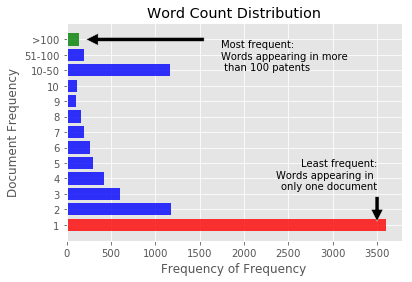

#### Most frequent words
The most frequent words are those that appear in more than 100 patents.
These are subsequently removed from the token set.

20 words identified appearing in more than 100 patents
Frequent words: [u'includes', u'one', u'first', u'method', u'second', u'device', u'system', u'provided', u'ha', u'least', u'portion', u'plurality', u'surface', u'apparatus', u'including', u'may', u'end', u'control', u'connected', u'invention'] 



Number of tokens: 	139533
Vocabulary: 		8407
Lexical Diversity: 	0.0602509800549


#### Least frequent words

3596 words identified appearing in only one abstract across all patents
e.g. [u'secondly', u'repositioning', u'saturating', u'similarity', u'dissolution', u'degradable', u'desirable', u'desirably', u'tensile', u'oldest'] 



Number of tokens: 	133670
Vocabulary: 		4811
Lexical Diversity: 	0.0359916211566


### 5.6 Identify bigrams
A bigram is a continguous sequence of two words. The nltk collocations packages is used to identify bigrams contained within the set of abstracts.

Bigrams require collocation and as such the lemmatised tokenised sentence, including stopwords (abstract_2) is used. 

To identify the 100 most meaningful bigrams, a filter is applied to remove bigrams that include stopwords or words contained within the most frequent word list.

Additional 'ignore' words have also been filtered from the set of bigrams to exclude non-meaningful results. These additional ignored words are mainly either 'positional' descriptors (e.g. 'left', 'right', 'inner', 'outer'), or generalised terms (e.g. 'make', 'combining', 'configured', 'whether') that are considered to not contribute to the lexical content. The context of terms added to the ignore_other list was assessed using the nltk 'concordance' command.


Displaying 25 of 85 matches:
ed characteristic value determining whether first measured characteristic value
ed characteristic value determining whether second measured characteristic valu
t temperature threshold determining whether temperature data exceeds second tem
xceeds second temperature threshold whether pressure data exceeds pressure thre
ke available information concerning whether electrical current flowing resistan
utput first check signal indicating whether access request directed first segme
tput second check signal indicating whether second executing unit active well c
 part response method may determine whether dispense cash roll sheet type store
detecting aftercooling time judging whether smaller predetermined cooling time 
cond temperature difference judging whether ratio second temperature difference
 therein winning number determining whether offer prize based determined winnin
referably form microphone detecting whether practicing swing timely premature l
 suction po

#### Tokenising abstracts with unigrams and bigrams
To complete the text analysis, the original abstract text is re-tokenised to include the multi-word bigrams using the nltk MWETokenizer.  This replaces the collocated tokens in the abstract text, with the multiwords identified.

Abstract_2 (the lemmatised form of the tokens) is used as the initial input.  

Number of tokens: 	130762
Vocabulary: 		4906
Lexical Diversity: 	0.0375185451431


### 5.7 Final Vocabulary
The final vocabulary at the end of pre-processing is the set of tokens remaining. The vocab size generated in this manner should be the same as that generated by the CountVectorizer used to create the sparse count vectors below.

4906


## 6. Generate sparse count vectors

  **CountVector:**  converts a collection of text documents to a matrix of token counts.

Generate the count vector representation for each patent asbstract. 
Initialise the "CountVector" object: since we have pre-processed all the abstracts, the default value ('None') is used for the parameters, "tokenizer", "preprocessor" and "stop_words".


(2500, 4906)


### 6.1 Vocabulary resulting from CountVectorizer
The vocabulary resulting from the CountVectorizer is used to create a dictionary, and written to the file vocab.txt

### 6.2 Create the spare vector count and write to file
The spare vector count is produced by reducing the matrix produced by the CountVectorizer to those items of the vocabulary with a count greater than zero.

### 6.3 Final Checks for Sparse Count Vector and  Pre-processing of text
To complete the pre-processing, a check of the tokenisation, lemmatisation, removal of words, replacememt of bigrams, and the final creation of sparse count vectors can be checked by examining an individual patent as shown below.

The sample patent below shows the following:
  1.   orignal abstract text   
  2.   initial tokenisation, including stop words
  3.   lemmatisation, e.g. surfaces -> surface
  4.   stopwords removed, e.g. 'for', 'is', 'and'
  5.   most and least frequent words removed, e.g. 'method', 'includes', 'first', 'second'.
  6.   bigrams tokens, e.g. 'semiconducter_substrate'
  7.   reduction to sparse vector
  8.   check of cross-reference to vocabulary

In [30]:
## Checking pre-processing steps to completion for an individual patent



1. Original <abstracts>:
A method for manufacturing a photodiode array includes providing a semiconductor substrate having first and second main surfaces opposite to each other. The semiconductor substrate has a first layer of a first conductivity proximate the first main surface and a second layer of a second conductivity proximate the second main surface. A via is formed in the substrate which extends to a first depth position relative to the first main surface. The via has a first aspect ratio. Generally simultaneously with forming the via, an isolation trench is formed in the substrate spaced apart from the via which extends to a second depth position relative to the first main surface. The isolation trench has a second aspect ratio different from the first aspect ratio.

2. Tokenised <abstracts_1>:
[u'method', u'for', u'manufacturing', u'photodiode', u'array', u'includes', u'providing', u'semiconductor', u'substrate', u'having', u'first', u'and', u'second', u'main', u'surfaces', u

### 7.Summary:
##### 1. Section 3, showed how to split  an aggregated XML file into seprate standalone files.
##### 2. Section 4.1,  showed how to get the patents classification from a highly nested XML files into structurally flat text file, using xml parsing.
##### 3. Section  4.2, deomnstrated how to get the citation list per patent from it's xml attribute.
##### 4. Section 4.3, illustrates the code to get the referencing count per patent
##### 5. Section 5 & 6, Showed the process of wrangling the abstract text to get into more useful numerical formate for further data analyis.

The wrangling cycle illustrated here, shows how a text starting with bellow statistics, ended up reduced to more sparse text while conserving the main text feature. The end output of this text, should serve a good basline line for further topic modelling, feature analysis as well as a basis for an efficient retrival system .


######################### Text Statistics Before Wrangling ##################################

Total number of words: 277617<br>
Total number of vocabs: 9855<br>
Lexical diversity is : 3.549855 %<br>

######################### Final Text Statistics After Wranling ##################################

Total number of words: 131714<br>
Total number of vocabs: 5572<br>
Lexical diversity is : 4.230378 %<br>